### Understanding the data

##### Importing all necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

##### Loading the dataset

In [16]:
# loading dataset
review = pd.read_csv(r'C:\Users\hp\AppData\Local\Temp\Rar$DIa13512.31083\Musical_instruments_reviews.csv')

In [17]:
review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [18]:
review.shape

(10261, 9)

### Data Preprocessing

In [19]:
review.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

There are 27 null values in the reviewerName column and 7 null values in the reviewText column, we will drop this rows

In [20]:
review.dropna(inplace=True)
review = review.reset_index()
review = review.drop(['index'], axis = 1)
review.shape

(10227, 9)

In [21]:
len(review['asin'].unique())

900

We have total 900 unique products in our dataset

##### Renaming columns for ease of reference

In [22]:
review = review.rename({'reviewerID':'review_id', 'reviewerName':'review_name', 'reviewText':'review_text', 
               'unixReviewTime':'unix_review_time', 'reviewTime':'review_time'}, axis = 1)
review.head()

,review_id,asin,review_name,helpful,review_text,overall,summary,unix_review_time,review_time
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


##### Concatenating the review_text and summary columns together

In [23]:
review['reviews'] = review['review_text'] + review['summary']
review.head()

,review_id,asin,review_name,helpful,review_text,overall,summary,unix_review_time,review_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


##### Dropping review_text and summary

In [24]:
review = review.drop(['review_text', 'summary'], axis = 1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,review_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


##### Handling review_time column into three separate columns as year, month, day

In [25]:
# Handling review_time column
'''Here we have an unusual review time column which has date and year, once we split both we will split the date 
further into month and date '''

# new data frame which has date and year
new = review["review_time"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
review["date"]= new[0] 
  
# making separate year column from new data frame 
review["year"]= new[1] 

review=review.drop(['review_time'], axis=1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,02 21,2014


In [26]:
# Splitting the date 
new1 = review["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
review["month"]= new1[0] 
  
# adding day to the main dataset 
review["day"]= new1[1] 

review=review.drop(['date'], axis=1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,2014,02,21


##### Removing unnecessary columns

In [27]:
review=review.drop(['review_name','unix_review_time'], axis=1)
#Creating a copy 
clean_reviews=review.copy()

##### Data Cleaning

In [28]:
import re

In [29]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [31]:
review['reviews'] = review['reviews'].apply(lambda x: review_cleaning(x))

In [32]:
review.head()

,review_id,asin,helpful,overall,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,not much to write about here but it does exact...,2014,02,28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,the product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,the primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,nice windscreen protects my mxl mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,this pop filter is great it looks and performs...,2014,02,21


##### Removing stopwords

In [33]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stop_words=pd.read_csv(r"C:\Users\hp\Downloads\stop.txt", error_bad_lines=False)
my_stop_words = stopwords.words('english')
my_stop_words.extend(stop_words)

In [37]:
review['reviews'] = review['reviews'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (my_stop_words)]))
review.head()

,review_id,asin,helpful,overall,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,much write exactly supposed filters pop sounds...,2014,02,28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,product exactly quite affordablei realized dou...,2013,03,16
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,primary job device block breath would otherwis...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,nice windscreen protects mxl mic prevents pops...,2014,02,14
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,pop filter great looks performs like studio fi...,2014,02,21


### Emotion Mining

##### Affinn file contains 3300+ words with a polarity score associated with each word used for sentimental analysis¶

In [38]:
#Sentiment analysis
afinn = pd.read_csv(r'C:\Users\hp\Downloads\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [39]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [40]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [41]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [42]:
review['sentiment_value'] = review['reviews'].apply(calculate_sentiment)

In [43]:
review

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,much write exactly supposed filters pop sounds...,2014,02,28,0
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,product exactly quite affordablei realized dou...,2013,03,16,1
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,primary job device block breath would otherwis...,2013,08,28,1
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,nice windscreen protects mxl mic prevents pops...,2014,02,14,4
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,pop filter great looks performs like studio fi...,2014,02,21,5
...,...,...,...,...,...,...,...,...,...
10222,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]",5.0,great expected thank allfive stars,2014,07,20,5
10223,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",5.0,ive thinking trying nanoweb strings bit put hi...,2014,07,2,26
10224,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",4.0,tried coated strings past including elixirs ne...,2014,07,22,11
10225,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]",4.0,well made elixir developed taylor guitars stri...,2014,07,1,18


In [44]:
# how many words are in the sentence?
review['word_count'] = review['reviews'].str.split().apply(len)
review['word_count']

0         23
1         53
2         46
3         22
4         19
        ... 
10222      5
10223    280
10224     54
10225    141
10226     55
Name: word_count, Length: 10227, dtype: int64

In [45]:
review.sort_values(by='sentiment_value')

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
5658,A34WEXT7SIRFE4,B000ULAP4U,"[9, 14]",2.0,cans decent back bucks theyve inflated thats r...,2012,02,3,-30,103
4101,A3M9FH2OZKYF4D,B000A2HOB6,"[1, 2]",1.0,crikey begin firstly hated fact package two st...,2013,06,23,-27,67
6737,A3FQ9WYUHG9CD,B001OLZYUU,"[0, 1]",4.0,fender treated polish cloth soft ecru colored ...,2013,12,4,-25,328
8783,A165EMA3YTIM6A,B004UJO41S,"[1, 11]",1.0,downgrade star returning back brookmays seller...,2012,01,3,-19,394
5172,A1S0HTDO0P4N5V,B000NJ2TIE,"[2, 2]",5.0,okay well lied subject line bad singers sound ...,2013,08,12,-14,72
...,...,...,...,...,...,...,...,...,...,...
8472,ADH0O8UVJOT10,B0043RZ9QQ,"[2, 2]",5.0,unfamiliar voxs amplug products things amazing...,2012,10,24,78,483
6555,A20JJ8634DG3FS,B001I8ITQA,"[10, 10]",5.0,comparisons compared side side following pedal...,2013,08,21,102,1077
5952,A1LCG14GZJI5LO,B000Y7Q2C4,"[1, 1]",5.0,love capo let tell capo journey ive used every...,2014,05,30,112,605
8608,A35YS5ND3K5FN,B004ISK48S,"[74, 75]",5.0,constructionthis amp certainly looks sharp nea...,2011,02,10,133,695


In [46]:
# Maximum sentiment value
review['sentiment_value'].max()

139

In [47]:
# review which is having max sentiment value
review[review['sentiment_value']==139]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
409,A27L5L6I7OSV5B,B0002CZV82,"[142, 150]",2.0,greg abrams review entitled tone snobs review ...,2011,06,30,139,691


In [48]:
# Full review at index 412
review['reviews'][412]

'best deal ever first pedal zoom gfx really electronic synthesized sounding alot echos stuff honestly best effect held phaserjet pipe effect got today man sounds crisp clean evenly distorted job distortion sustain best buy best price bodow trinidadboss boss'

In [49]:
# minimum sentiment value
review['sentiment_value'].min()

-30

In [50]:
# review which is having min sentiment value
review[review['sentiment_value']==-35]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count


In [51]:
# Full review at index 6758
review['reviews'][6758]

'bought pack im still using one far still good nice quality good price toocool'

In [52]:
# Sentiment score of the whole review
review['sentiment_value'].describe()

count    10227.000000
mean         7.174734
std          8.155064
min        -30.000000
25%          2.000000
50%          6.000000
75%         10.000000
max        139.000000
Name: sentiment_value, dtype: float64

In [53]:
# Sentiment score of the whole review
review[review['sentiment_value']<=0]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,much write exactly supposed filters pop sounds...,2014,02,28,0,23
7,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",3.0,use cable run output pedal chain input fender ...,2012,11,16,0,87
12,A2NIT6BKW11XJQ,B00005ML71,"[0, 0]",3.0,use using large sustaining pedal playing piano...,2013,11,17,0,14
28,A2CCGGDGZ694CT,B000068NVI,"[1, 1]",4.0,hosa xlr cables affordable heavily madei large...,2012,07,11,-2,27
29,A27DR1VO079F1V,B000068NVI,"[0, 0]",5.0,bought go board amp use mobile church take bea...,2014,02,19,0,13
...,...,...,...,...,...,...,...,...,...,...
10144,A768OB1LNE356,B00FXKIG5I,"[1, 2]",2.0,larger ones sometimes neck snap thought might ...,2014,03,22,-3,42
10147,AYTKUTAP0VA53,B00FXKIG5I,"[0, 0]",5.0,thing tiny breakable swivel head original snar...,2014,02,9,0,11
10154,A3M1PLEYNDEYO8,B00GTSM8FW,"[0, 0]",5.0,several capos first adjustable tension several...,2014,04,29,-5,68
10188,A2FY8306QHI5LE,B00IZCSW3M,"[0, 0]",4.0,twice price standard strings daddario nyxl str...,2014,06,21,0,39


In [54]:
review[review['sentiment_value']>=100]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
409,A27L5L6I7OSV5B,B0002CZV82,"[142, 150]",2.0,greg abrams review entitled tone snobs review ...,2011,06,30,139,691
5952,A1LCG14GZJI5LO,B000Y7Q2C4,"[1, 1]",5.0,love capo let tell capo journey ive used every...,2014,05,30,112,605
6555,A20JJ8634DG3FS,B001I8ITQA,"[10, 10]",5.0,comparisons compared side side following pedal...,2013,08,21,102,1077
8608,A35YS5ND3K5FN,B004ISK48S,"[74, 75]",5.0,constructionthis amp certainly looks sharp nea...,2011,02,10,133,695


### Visualization

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

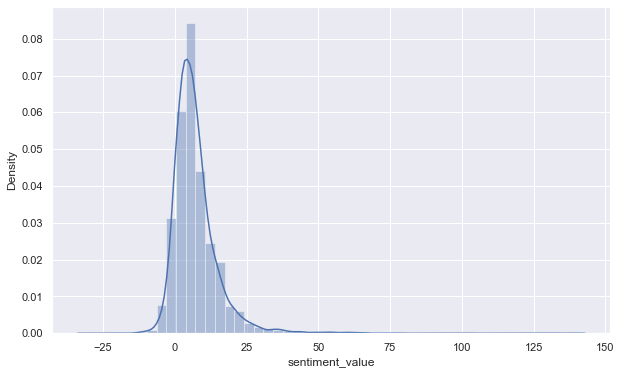

In [55]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(review['sentiment_value'])

In [56]:
review['index']=range(0,len(review))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

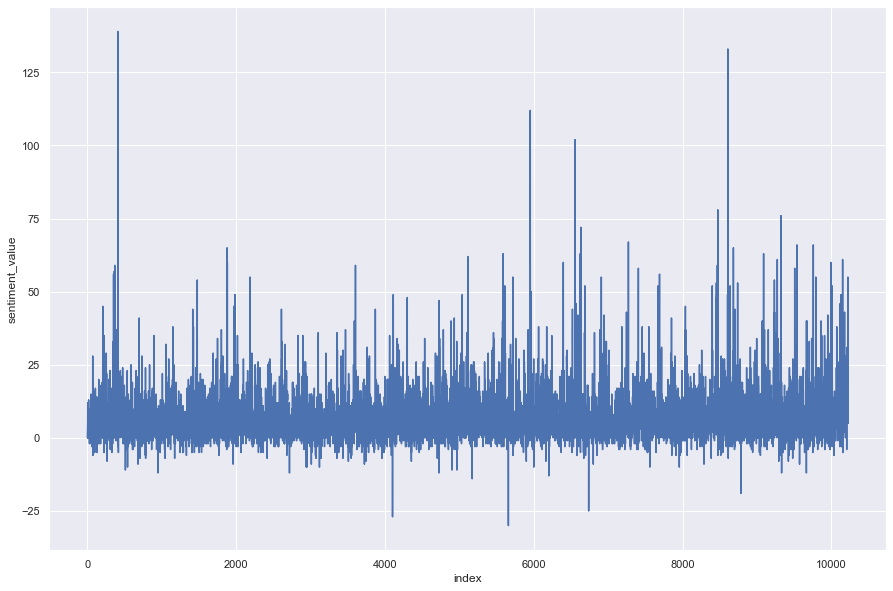

In [57]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=review)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

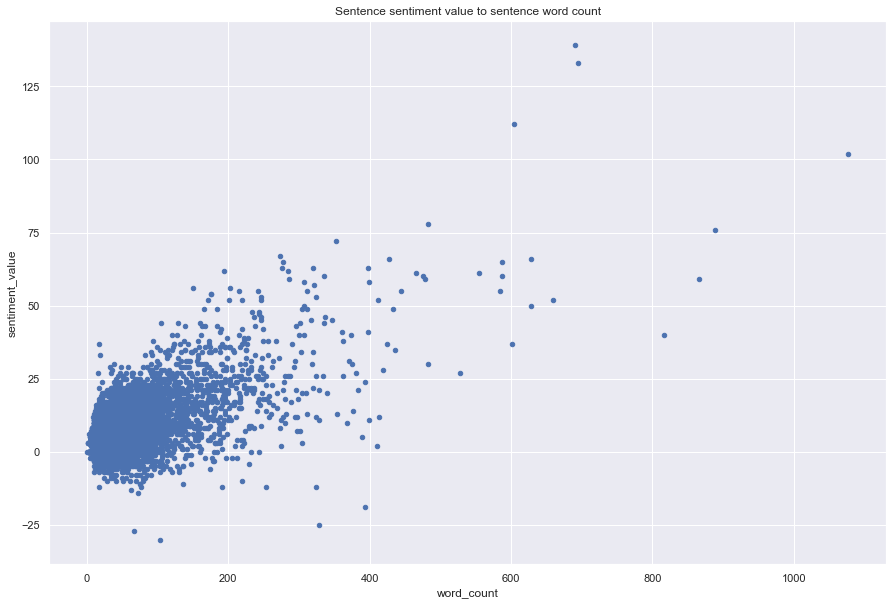

In [58]:
review.plot.scatter(x='word_count', y='sentiment_value', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [59]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_value'] < 0:
        val = 'Negative'
    elif row['sentiment_value'] == 0: 
        val = 'Neutral'
    elif row['sentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [60]:
#Applying the function in our new column
review['sentiment_category'] = review.apply(sentiment_cat, axis=1)
review.head()

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count,index,sentiment_category
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,much write exactly supposed filters pop sounds...,2014,02,28,0,23,0,Neutral
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,product exactly quite affordablei realized dou...,2013,03,16,1,53,1,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,primary job device block breath would otherwis...,2013,08,28,1,46,2,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,nice windscreen protects mxl mic prevents pops...,2014,02,14,4,22,3,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,pop filter great looks performs like studio fi...,2014,02,21,5,19,4,Positive


In [61]:
review['sentiment_category'].value_counts()

Positive    8829
Negative     757
Neutral      641
Name: sentiment_category, dtype: int64

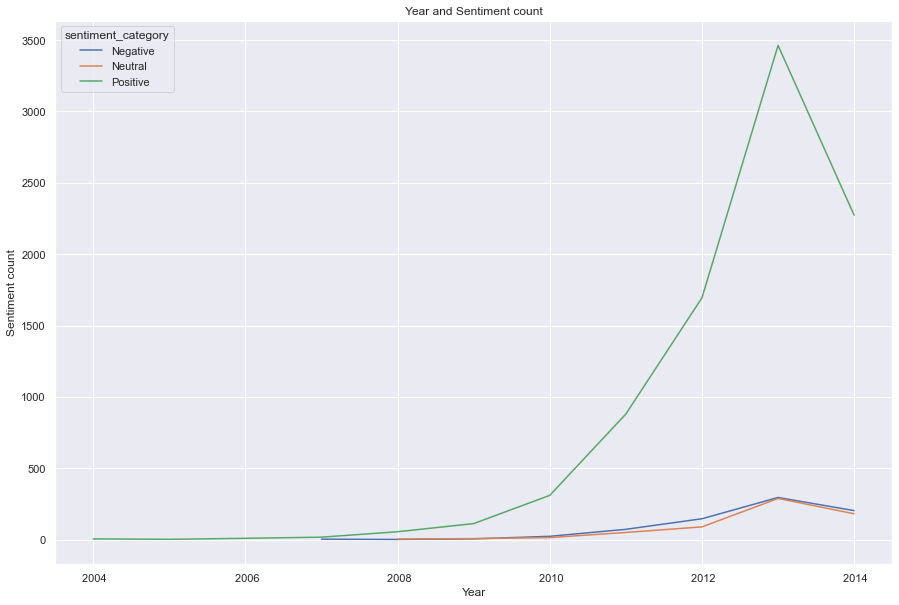

In [62]:
# Year vs Sentiment count
review.groupby(['year','sentiment_category'])['sentiment_category'].count().unstack().plot(figsize = (15,10),legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

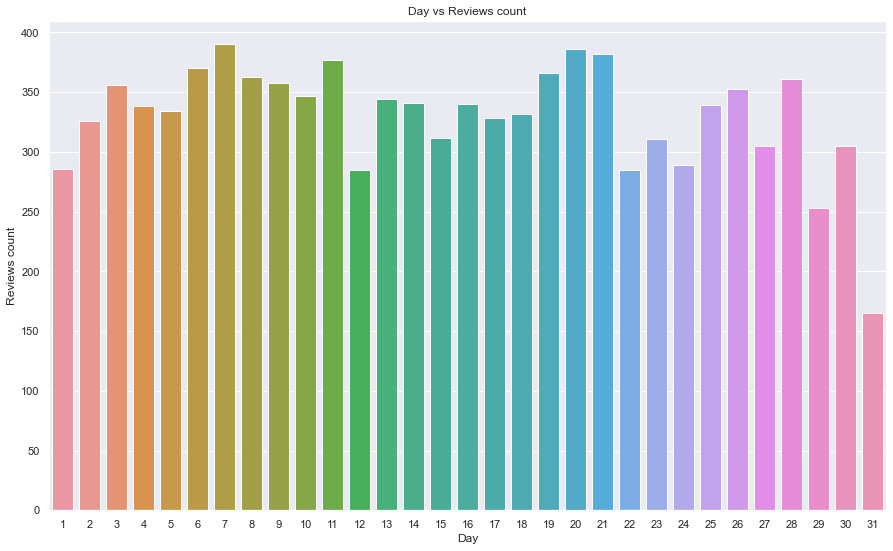

In [63]:
# Day of month vs Reviews count

#Creating a dataframe
day=pd.DataFrame(review.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.set(rc={'figure.figsize':(15, 9)})
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

### Calculate percentage for each sentiment category

In [65]:
def count_values_in_column(review,feature):
 total=review.loc[:,feature].value_counts(dropna=False)
 percentage=round(review.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(review,'sentiment_category')

,Total,Percentage
Positive,8829,86.33
Negative,757,7.40
Neutral,641,6.27


In [66]:
y = count_values_in_column(review, 'sentiment_category')
y['Percentage']

Positive    86.33
Negative     7.40
Neutral      6.27
Name: Percentage, dtype: float64

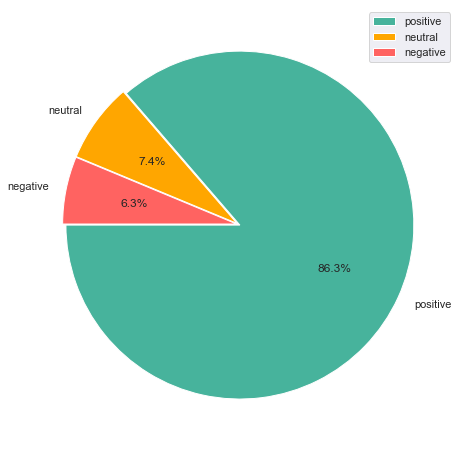

In [67]:
import matplotlib.pyplot as plt
y=count_values_in_column(review, 'sentiment_category')
y=y['Total']
plt.figure(figsize=(8,8))
mylabels = ['positive', 'neutral','negative']

plt.pie(y, labels = mylabels, startangle=180, colors=['#47B39C', '#ffa600','#ff6361'], autopct='%1.1f%%', explode=[0.01,0.01,0.01])
plt.legend()
plt.show()

### Inference

##### From the above visualization it is very clear that the number of positive reviews for the musical instrument on Amazon are high.